In [4]:
import datetime
import numpy as np
import pandas as pd
import random
import glob
from scipy.signal import find_peaks

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator
import matplotlib.backends.backend_pdf as p 


%matplotlib inline

import vasu

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


In [5]:
def read_data(price_file):
    price_data = pd.read_csv(price_file,index_col=0, parse_dates = True,
                             usecols = [u'Date',u'Open Price', u'High Price', u'Low Price', u'Close Price'],
                             dtype= {u'Open Price':np.float64,u'High Price':np.float64,
                                     u'Low Price':np.float64,u'Close Price':np.float64}).sort_index()
    return price_data


            Open Price  High Price  Low Price  Close Price
Date                                                      
2018-07-02      118.35      118.35     112.65       113.60
2018-07-03       99.70       99.70      93.15        96.30
2018-07-05       64.60       69.45      63.80        68.25
2018-07-06       67.40       68.80      66.60        68.45
2018-07-08       77.05       77.60      73.05        73.70
2018-07-09       78.75       78.80      76.70        77.65
2018-07-11      104.85      106.20     104.00       105.45
2018-07-12      102.30      102.55      99.20       100.10
2018-07-13       68.70       69.50      66.90        67.50
2018-07-16       66.60       67.90      65.60        66.65
2018-07-17       67.40       67.40      62.65        65.00
2018-07-18       65.25       65.65      62.45        64.25
2018-07-19       63.05       63.75      59.70        62.90
2018-07-20       62.65       64.00      61.65        63.45
2018-07-23       64.40       64.50      62.20        63.

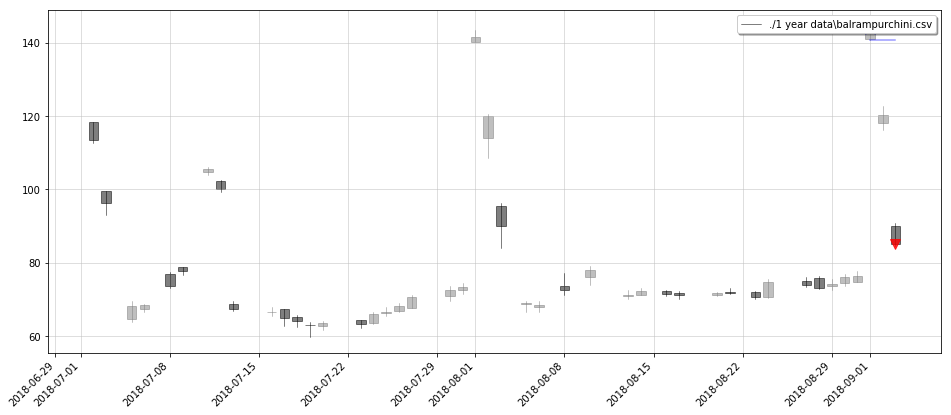

----------------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price
Date                                                      
2018-07-02      153.25      159.60     152.60       157.85
2018-07-03      151.50      151.60     147.15       148.35
2018-07-05      129.90      131.95     128.35       131.30
2018-07-06      119.70      122.25     116.25       121.70
2018-07-08      118.80      119.40     116.05       116.50
2018-07-09       91.00       93.75      90.10        91.85
2018-07-11       95.95       95.95      95.15        95.45
2018-07-12       82.30       82.55      80.00        80.10
2018-07-13      107.40      108.70     102.75       103.80
2018-07-16      104.15      105.10     100.50       101.00
2018-07-17      102.20      104.45     100.80       104.05
2018-07-18      104.20      105.05      99.00        99.55
2018-07-19       99.90      101.20      96.70        97.90
2018-07-20       98.40      104.20    

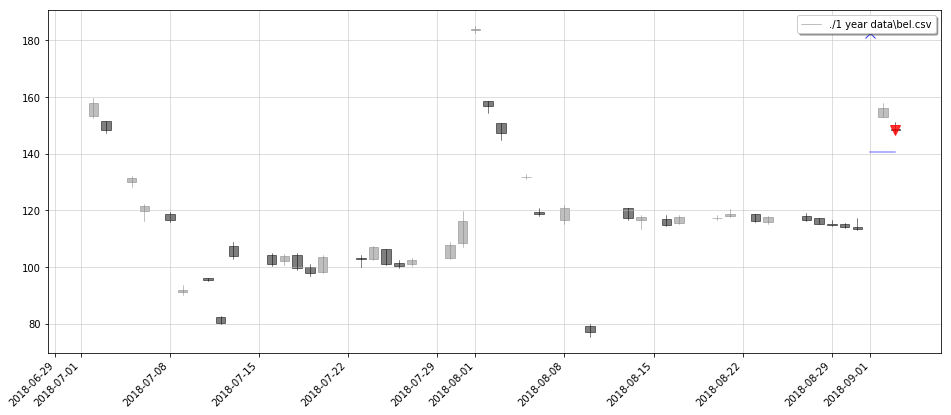

----------------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price
Date                                                      
2018-07-02       94.15       95.00      93.05        94.25
2018-07-03       88.20       89.20      85.20        85.45
2018-07-05       84.50       84.95      83.40        84.35
2018-07-06       75.05       76.50      75.00        76.35
2018-07-08       75.45       75.45      72.70        73.45
2018-07-09       81.40       83.30      78.30        79.35
2018-07-11       69.95       69.95      69.45        69.70
2018-07-12       65.80       66.75      64.35        65.95
2018-07-13       69.55       69.60      66.85        67.15
2018-07-16       67.15       67.25      64.60        65.00
2018-07-17       65.50       68.30      64.45        68.05
2018-07-18       68.10       68.55      65.25        66.55
2018-07-19       66.95       67.75      65.45        66.15
2018-07-20       66.30       68.20    

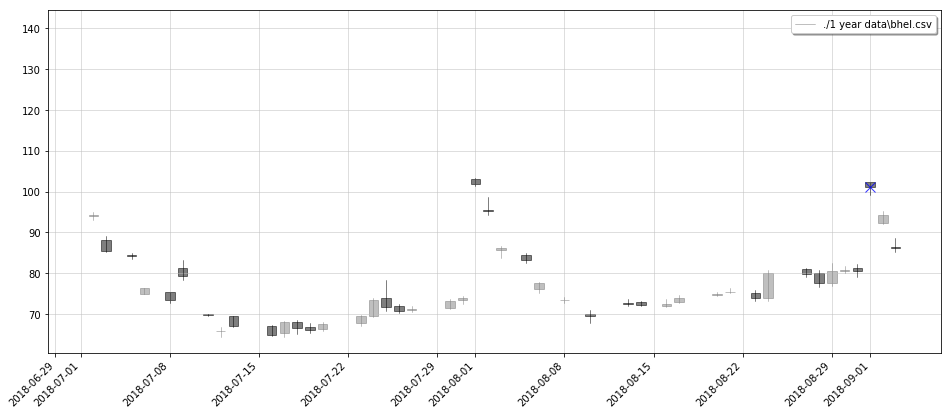

----------------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price
Date                                                      
2018-07-02      146.70      146.90     140.10       141.00
2018-07-03      101.40      103.50      98.00       101.05
2018-07-05      101.40      103.95     101.00       102.30
2018-07-06       96.60       99.70      96.10        98.55
2018-07-08       98.00       98.35      94.20        94.95
2018-07-09       93.90       94.80      92.40        94.15
2018-07-11       86.90       86.90      86.00        86.35
2018-07-12       81.50       81.85      78.30        79.55
2018-07-13       85.45       85.45      80.85        81.70
2018-07-16       82.00       82.00      76.80        77.50
2018-07-17       77.00       82.45      76.50        81.95
2018-07-18       82.70       83.15      77.10        79.05
2018-07-19       79.50       84.30      77.70        82.75
2018-07-20       82.25       83.90    

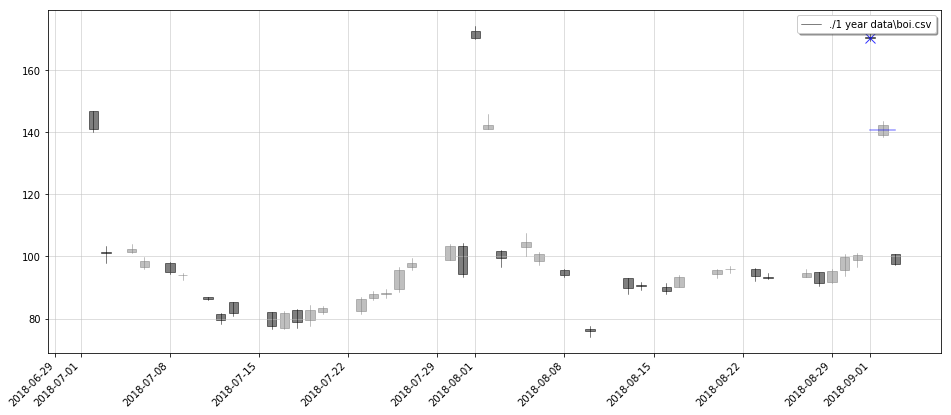

----------------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price
Date                                                      
2018-07-02      473.05      481.60     468.65       476.25
2018-07-03      445.10      448.65     438.70       443.40
2018-07-05      375.50      388.30     374.00       385.80
2018-07-06      411.00      417.85     410.20       416.05
2018-07-08      401.00      402.30     392.60       394.10
2018-07-09      355.40      359.50     353.05       356.95
2018-07-11      288.00      289.95     286.40       288.75
2018-07-12      328.40      330.95     321.45       325.40
2018-07-13      381.10      389.00     375.30       386.65
2018-07-16      385.00      392.00     379.90       382.20
2018-07-17      389.95      395.50     384.60       392.65
2018-07-18      396.00      404.85     393.90       402.35
2018-07-19      399.90      402.95     391.45       398.30
2018-07-20      394.10      395.00    

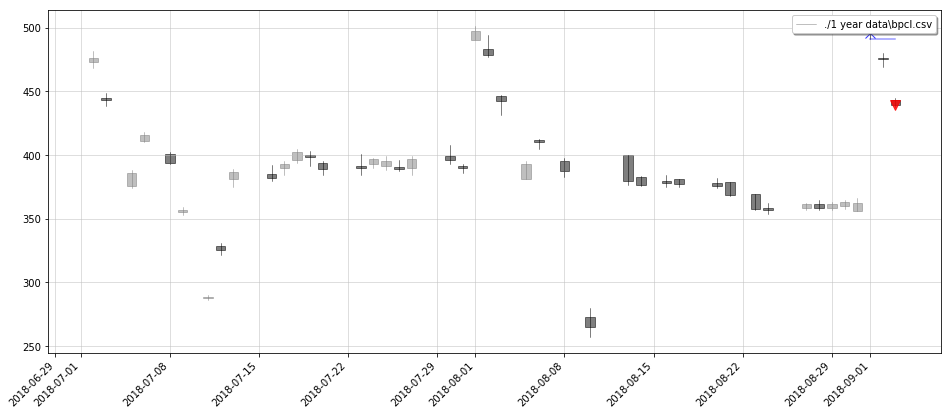

----------------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price
Date                                                      
2018-07-02      958.20      959.00     922.00       938.55
2018-07-03      938.00      952.80     933.80       949.55
2018-07-05      936.80      940.65     921.05       928.20
2018-07-06      905.00      926.00     905.00       921.35
2018-07-08      960.90      970.95     959.10       968.80
2018-07-09     1086.95     1086.95    1065.35      1073.95
2018-07-11     1029.00     1034.85    1026.75      1031.55
2018-07-12     1000.00     1000.00     934.45       961.95
2018-07-13      997.00      997.80     976.00       983.35
2018-07-16      985.00      990.90     970.20       972.10
2018-07-17      977.20      984.00     969.00       980.30
2018-07-18      985.90      996.80     984.05       989.90
2018-07-19      990.00      994.50     976.50       982.10
2018-07-20      983.60     1004.50    

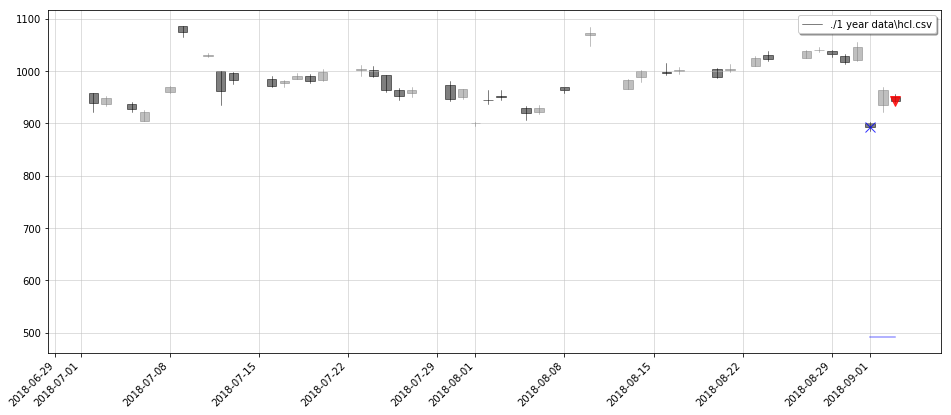

----------------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price
Date                                                      
2018-07-02      384.95      408.90     382.50       396.35
2018-07-03      364.00      366.60     355.10       357.80
2018-07-05      292.25      300.85     288.50       297.00
2018-07-06      312.00      315.90     311.05       315.00
2018-07-08      293.00      296.20     287.30       288.60
2018-07-09      253.00      255.60     251.10       253.10
2018-07-11      228.90      231.00     228.00       229.60
2018-07-12      229.70      230.30     223.50       224.80
2018-07-13      272.00      273.70     263.55       270.20
2018-07-16      269.50      272.00     263.25       264.35
2018-07-17      271.00      283.50     270.00       281.30
2018-07-18      282.90      287.85     282.50       286.10
2018-07-19      283.90      286.00     274.30       284.40
2018-07-20      279.10      281.35    

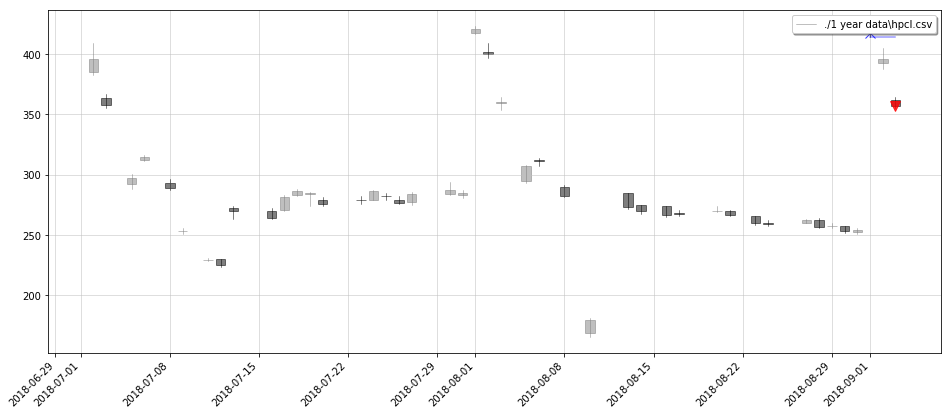

----------------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price
Date                                                      
2018-07-02      155.00      156.90     152.05       152.80
2018-07-03      149.10      151.20     143.60       144.40
2018-07-05      136.70      141.40     134.05       140.40
2018-07-06      117.00      121.00     116.00       119.10
2018-07-08      118.50      124.45     118.05       121.90
2018-07-09      118.05      121.85     116.10       121.35
2018-07-11       94.50       94.70      93.85        94.05
2018-07-12       88.00       88.40      84.50        86.20
2018-07-13      112.25      112.25     105.35       106.80
2018-07-16      107.40      107.40      99.00        99.75
2018-07-17       99.50      103.75      97.75       102.85
2018-07-18      103.50      104.80      97.10        99.55
2018-07-19      100.00      102.25      97.50        99.10
2018-07-20       99.20      103.25    

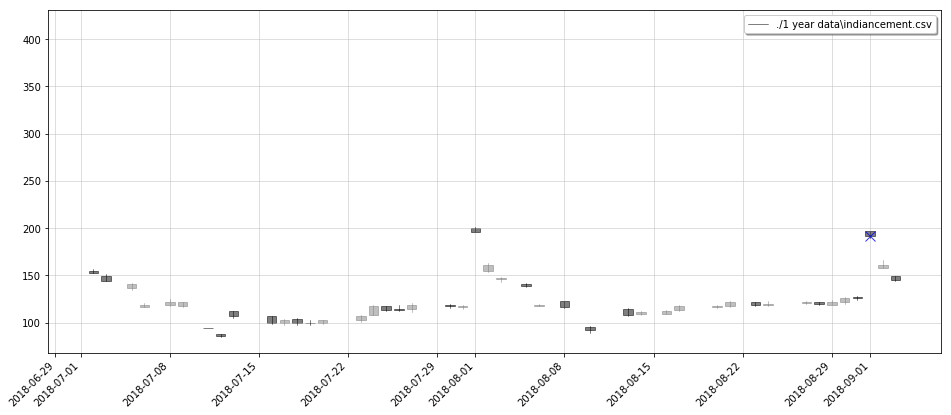

----------------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price
Date                                                      
2018-07-02     1116.00     1124.80    1103.55      1109.05
2018-07-03     1155.00     1160.00    1138.05      1144.10
2018-07-05     1181.25     1190.00    1175.50      1183.00
2018-07-06     1238.00     1258.00    1238.00      1252.45
2018-07-08     1374.00     1379.95    1360.65      1367.95
2018-07-09      734.35      735.15     723.80       732.80
2018-07-11      673.00      677.50     672.00       675.50
2018-07-12      672.00      685.75     665.60       682.80
2018-07-13     1315.00     1331.60    1298.35      1317.40
2018-07-16     1317.40     1384.40    1287.70      1332.85
2018-07-17     1329.70     1349.50    1312.70      1327.90
2018-07-18     1339.80     1343.40    1314.00      1322.55
2018-07-19     1323.00     1331.90    1309.10      1316.70
2018-07-20     1326.00     1367.15    

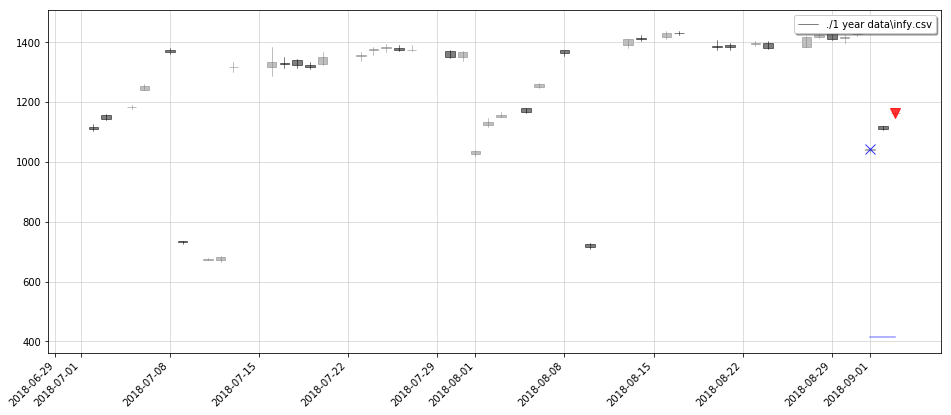

----------------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price
Date                                                      
2018-07-02      406.00      409.75     403.50       404.75
2018-07-03      382.65      384.45     378.80       379.40
2018-07-05      160.50      165.30     159.10       164.30
2018-07-06      174.90      176.45     172.80       174.80
2018-07-08      166.85      168.75     166.25       166.65
2018-07-09      154.30      154.40     152.50       153.40
2018-07-11      139.00      139.40     138.35       138.95
2018-07-12      132.75      133.60     128.70       129.75
2018-07-13      160.00      160.35     155.75       159.10
2018-07-16      158.95      160.00     157.05       157.50
2018-07-17      161.45      165.85     160.10       164.45
2018-07-18      165.00      168.20     165.00       167.20
2018-07-19      166.80      166.80     162.70       165.80
2018-07-20      164.25      164.25    

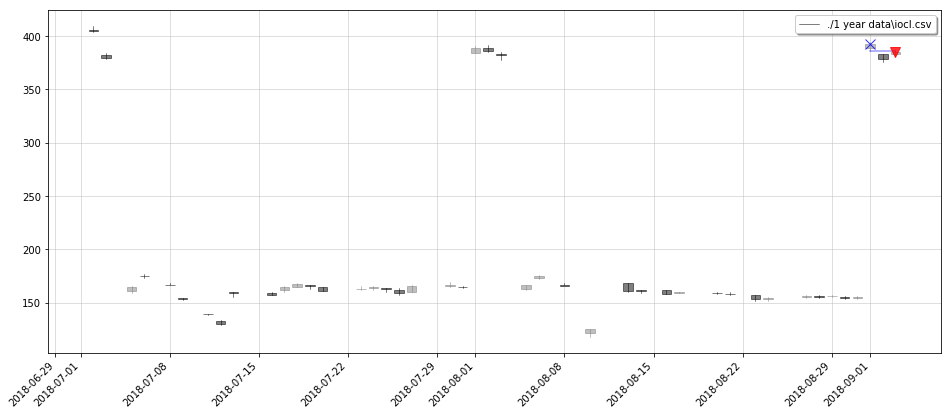

----------------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price
Date                                                      
2018-07-02      164.50      166.25     158.85       165.45
2018-07-03      163.00      164.70     161.90       163.50
2018-07-05      171.15      172.30     170.00       170.50
2018-07-06      162.00      163.50     161.80       162.50
2018-07-08      157.00      159.90     156.35       158.85
2018-07-09      170.50      170.55     165.90       169.55
2018-07-11      155.00      155.05     154.50       154.85
2018-07-12      140.00      141.10     136.55       137.85
2018-07-13      154.20      155.50     151.90       152.95
2018-07-16      153.00      157.00     152.05       155.60
2018-07-17      155.00      156.00     153.05       155.30
2018-07-18      155.95      156.10     152.80       155.25
2018-07-19      155.00      155.85     153.45       154.55
2018-07-20      154.00      156.00    

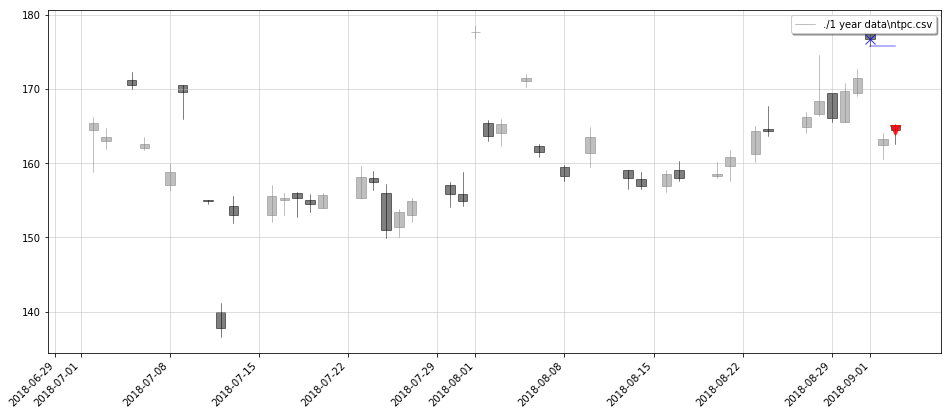

----------------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price
Date                                                      
2018-07-02      296.60      297.90     290.00       292.80
2018-07-03      255.05      255.35     246.05       246.65
2018-07-05      242.45      248.20     242.05       246.50
2018-07-06      271.05      272.90     268.40       269.65
2018-07-08      309.85      311.70     303.05       304.05
2018-07-09      295.90      295.90     289.45       291.65
2018-07-11      288.90      288.90     285.95       286.55
2018-07-12      277.00      277.35     272.10       275.40
2018-07-13      262.10      262.40     256.80       257.75
2018-07-16      257.00      257.50     251.00       251.60
2018-07-17      250.70      259.85     250.45       259.05
2018-07-18      260.10      262.50     256.15       259.55
2018-07-19      259.40      263.50     256.20       260.20
2018-07-20      259.90      263.00    

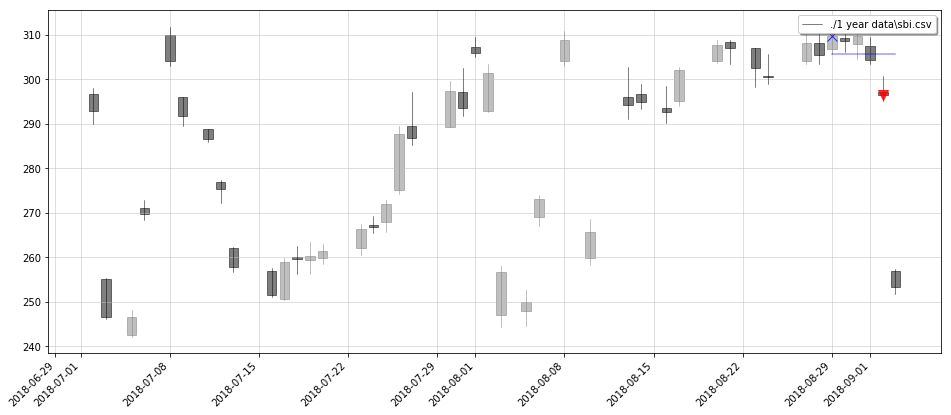

----------------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price
Date                                                      
2018-07-02      380.40      385.40     375.20       377.80
2018-07-03      345.00      355.30     343.25       347.80
2018-07-05      337.85      337.85     333.70       335.15
2018-07-06      296.30      306.90     295.25       305.40
2018-07-08      255.20      256.00     250.55       251.60
2018-07-09      269.55      279.90     269.25       277.40
2018-07-11      194.95      195.75     193.35       194.85
2018-07-12      162.25      164.20     160.80       162.40
2018-07-13      267.30      269.40     262.70       263.60
2018-07-16      260.50      260.80     250.50       252.10
2018-07-17      253.00      259.00     252.30       257.95
2018-07-18      259.45      259.45     247.30       251.85
2018-07-19      254.00      257.85     251.20       252.50
2018-07-20      252.70      254.00    

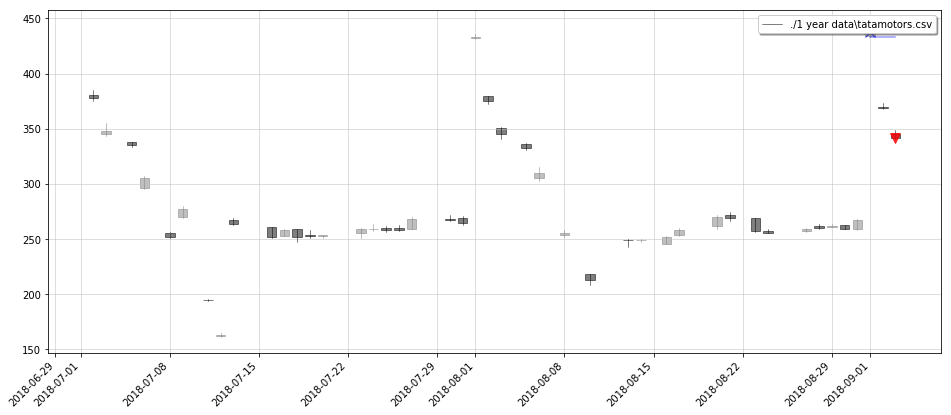

----------------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price
Date                                                      
2018-07-02      668.00      682.20     657.00       661.80
2018-07-03      657.00      661.40     644.65       647.70
2018-07-05      585.95      597.95     581.00       596.45
2018-07-06      582.10      603.90     581.90       602.10
2018-07-08      557.35      576.70     553.65       573.15
2018-07-09      602.30      622.00     597.05       619.15
2018-07-11      581.00      582.25     579.00       580.25
2018-07-12      510.70      514.90     503.20       509.30
2018-07-13      559.35      562.00     553.00       558.60
2018-07-16      559.70      559.90     517.05       519.25
2018-07-17      522.00      535.70     513.00       532.35
2018-07-18      536.00      536.95     501.00       504.25
2018-07-19      508.00      513.40     493.00       498.65
2018-07-20      499.00      505.75    

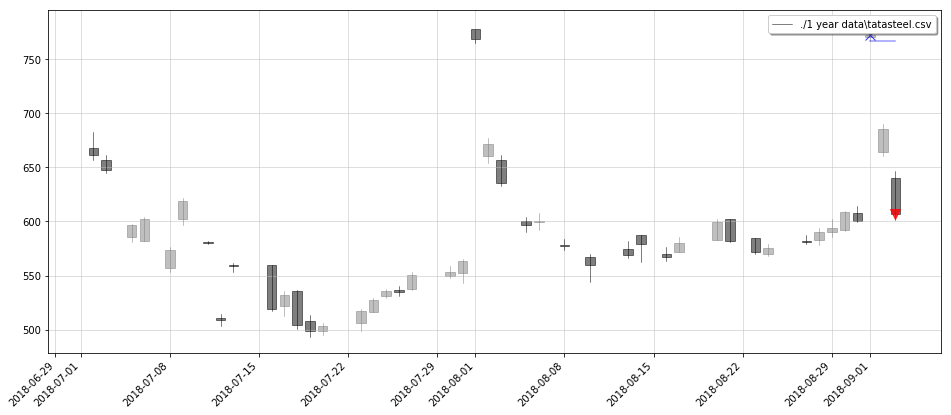

----------------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price
Date                                                      
2018-07-02      298.20      298.20     288.00       289.35
2018-07-03      288.45      290.85     284.30       285.35
2018-07-05      270.00      275.65     267.20       274.75
2018-07-06      258.05      265.85     258.05       264.60
2018-07-08      275.60      279.50     275.60       277.45
2018-07-09      321.90      328.25     319.10       324.70
2018-07-11      325.40      327.75     324.55       325.35
2018-07-12      332.80      336.35     324.45       333.30
2018-07-13      279.80      289.80     278.25       280.85
2018-07-16      279.25      287.00     278.85       283.10
2018-07-17      283.00      288.95     281.75       283.90
2018-07-18      286.00      287.30     283.65       284.80
2018-07-19      286.00      288.35     281.60       285.80
2018-07-20      287.50      290.60    

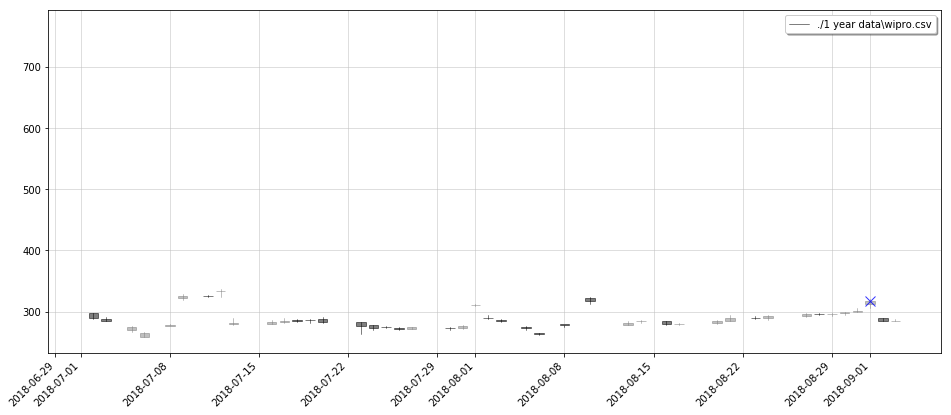

----------------------------------------------------------------------------


In [9]:
for file_name in glob.glob('./1 year data/*.csv'):
    price_data = read_data(file_name)
    sample_data = price_data.loc[datetime.date(year=2018, month=7,day=2):datetime.date(year=2018,month=9,day=3)]
    print(sample_data)
    trend_data = vasu.get_trend_data(sample_data)
    
    def split_data(dataframe):
        train_data = dataframe[(dataframe['high_slope'].notnull()) | (dataframe['low_slope'].notnull())].copy()
        test_data = dataframe[~((dataframe['high_slope'].notnull()) | (dataframe['low_slope'].notnull()))].copy()
        return train_data,test_data
    
    train_data,test_data = split_data(trend_data)
    
    def get_latest_peak_info(dataframe):
        return_dict = {}
        high_data = dataframe[dataframe['high_slope'].notnull()].tail(1)
        low_data = dataframe[dataframe['low_slope'].notnull()].tail(1)
        latest_high_date = high_data.index.to_pydatetime()[0]
        latest_low_date = low_data.index.to_pydatetime()[0]

        if latest_high_date > latest_low_date:
            return_dict['peak_type'] = 'high'
            return_dict['peak_data'] = high_data
        elif latest_high_date < latest_low_date:
            return_dict['peak_type'] = 'low'
            return_dict['peak_data'] = low_data
        else:
            return_dict['peak_type'] = 'high&low'
            return_dict['peak_data'] = low_data
    
        return return_dict
    
    peak_info =  get_latest_peak_info(train_data)
    peak_type = peak_info['peak_type']
    peak_data = peak_info['peak_data']
    
    peak_date = peak_data.index.to_pydatetime()[0]
    trend_before_peak = peak_data['trend'].values[0]
    peak_high_slope = peak_data['high_slope'].values[0]
    peak_low_slope = peak_data['low_slope'].values[0]
    peak_high = peak_data['High Price'].values[0]
    peak_low = peak_data['Low Price'].values[0]
    #print(peak_type)
    #print(peak_high_slope)
    #print(trend_before_peak)
    #higher high after bullish or sideways trend
    if (peak_type == 'high') and (peak_high_slope > 0.0) and (trend_before_peak != 'bearish'):
        low_mark_price = peak_low
        signal_data = test_data[test_data['Close Price'] < low_mark_price][1:2].copy()
    else:
        signal_data = test_data[test_data['Close Price'] > low_mark_price][1:2].copy()
    
    print(signal_data)
    
    if len(signal_data) > 0:
        print('Sell!')
        print('Benchmark Price is : %.2f' % low_mark_price)
        print('Signal Date is : %s' % signal_data.index.to_pydatetime()[0])
        print('Closing Price on signal is : %.2f' % signal_data['Close Price'].values)
        
    signal_to_end_data = trend_data.loc[peak_date:].copy()
    signal_to_end_data['benchmark price'] = low_mark_price
    benchmark_series = signal_to_end_data['benchmark price']
    
    '''
    candlestick_ohlc(ax,quotes,width=0.75,colorup='grey',colordown='black' ,alpha=0.5)
    #ohlc=price_data[['Date','Open Price','High Price','Low Price','Close Price']]
    #ohlc_arr=np.array(ohlc)
    #ohlc_arr2=np.hstack([np.arange(ohlc_arr[:,0].size)[:,np.newaxis], ohlc_arr[:,1:]])
    #ndays=ohlc_arr2[:,0]
    #candlestick_ohlc(ax,ohlc_arr2,width=0.75,colorup='gray',colordown='black',alpha=0.6)
    #ax.set_xticks(ndays[::1])
    '''
    fig, ax = plt.subplots(figsize = (16,7))
    fig.subplots_adjust(bottom=0.2)

    quotes = zip(mdates.date2num(sample_data.index.to_pydatetime()),sample_data[u'Open Price'], 
                             sample_data[u'High Price'],sample_data[u'Low Price'], sample_data[u'Close Price'])
    candlestick_ohlc(ax,quotes,width=0.75,colorup='grey',colordown='black' ,alpha=0.5)

    plt.plot(benchmark_series, "-", color='blue', alpha = 0.4)
    plt.plot(signal_data['Close Price'], "v", color='red',markersize=10,alpha = 0.8)
    plt.plot(peak_data['Close Price'], "x", color='b',markersize=10, alpha = 0.8)

    ax.xaxis_date()
    ax.legend([file_name],loc='upper right', shadow=True, fancybox=True)
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

    plt.rc('axes', grid=True)
    plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)
    plt.show()
    
    print('----------------------------------------------------------------------------')